# Lecture 2: CFG and nuts-and-bolts parsing

In [1]:
import nltk

In [2]:
gpp = nltk.CFG.fromstring("""
... NP -> NP PP 
... PP -> P NP
... NP -> 'covers' | 'doors' | 'books' | 'tables' 
... NP -> 'titles' | 'carpets' | 'floors' | 'windows'
... P -> 'in' | 'by' | 'near' | 'on' | 'with' | 'under'
... """)

In [3]:
gpp

<Grammar with 16 productions>

In [4]:
print(gpp)

Grammar with 16 productions (start state = NP)
    NP -> NP PP
    PP -> P NP
    NP -> 'covers'
    NP -> 'doors'
    NP -> 'books'
    NP -> 'tables'
    NP -> 'titles'
    NP -> 'carpets'
    NP -> 'floors'
    NP -> 'windows'
    P -> 'in'
    P -> 'by'
    P -> 'near'
    P -> 'on'
    P -> 'with'
    P -> 'under'


In [5]:
s1 = ['titles','on','books','under','tables']
parser = nltk.ChartParser(gpp)

In [6]:
gen1 = parser.parse(s1)
for t in gen1: print(t)

(NP
  (NP (NP titles) (PP (P on) (NP books)))
  (PP (P under) (NP tables)))
(NP
  (NP titles)
  (PP (P on) (NP (NP books) (PP (P under) (NP tables)))))


In [11]:
gen1 = parser.parse(s1)

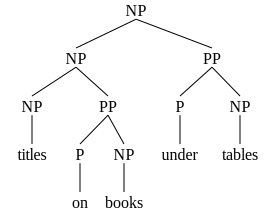

In [12]:
next(gen1)

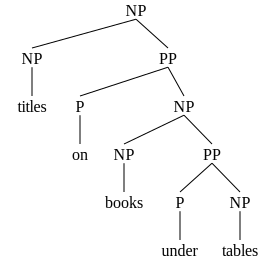

In [8]:
next(gen1)

In [14]:
next(gen1)

StopIteration: 

## I shot an elephant in my pajamas

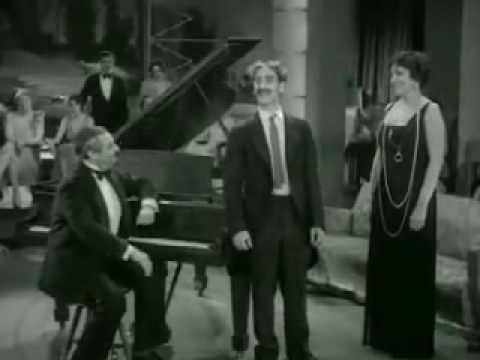

In [12]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('NfN_gcjGoJo')

In [13]:
groucho_grammar = nltk.CFG.fromstring("""
... S -> NP VP
... PP -> P NP
... NP -> Det N | Det N PP | 'I'
... VP -> V NP | VP PP
... Det -> 'an' | 'my'
... N -> 'elephant' | 'pajamas'
... V -> 'shot'
... P -> 'in'
... """)

In [14]:
se = ['I','shot','an','elephant','in','my','pajamas']
parser = nltk.ChartParser(groucho_grammar)

In [15]:
gen1 = parser.parse(se)

In [16]:
for t in gen1: print(t)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


In [17]:
gen1 = parser.parse(se)

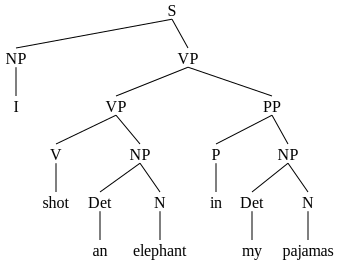

In [18]:
next(gen1)

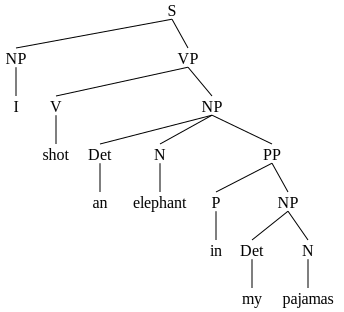

In [19]:
next(gen1)

## Mathematical construction of CFG

---------
Mathematically, a context free grammar is a tuple
$N,\Sigma,P,S$, where

$N$ is a finite set (called the non-terminal symbols), 

$\Sigma$ is a set disjoint from $N$ (called the terminal symbols),

$P$ is a finite subset of $N \times (P \cup \Sigma)*$ (called the productions or rules), and 

$S$ is an element of $N$ (called the start symbol).

---------

In [20]:
print(groucho_grammar)

Grammar with 13 productions (start state = S)
    S -> NP VP
    PP -> P NP
    NP -> Det N
    NP -> Det N PP
    NP -> 'I'
    VP -> V NP
    VP -> VP PP
    Det -> 'an'
    Det -> 'my'
    N -> 'elephant'
    N -> 'pajamas'
    V -> 'shot'
    P -> 'in'


In [21]:
groucho_grammar.start()

S

In [22]:
type(groucho_grammar.start())

nltk.grammar.Nonterminal

In [30]:
groucho_grammar.productions()

[S -> NP VP,
 PP -> P NP,
 NP -> Det N,
 NP -> Det N PP,
 NP -> 'I',
 VP -> V NP,
 VP -> VP PP,
 Det -> 'an',
 Det -> 'my',
 N -> 'elephant',
 N -> 'pajamas',
 V -> 'shot',
 P -> 'in']

In [23]:
set(groucho_grammar.productions())

{Det -> 'an',
 Det -> 'my',
 N -> 'elephant',
 N -> 'pajamas',
 NP -> 'I',
 NP -> Det N,
 NP -> Det N PP,
 P -> 'in',
 PP -> P NP,
 S -> NP VP,
 V -> 'shot',
 VP -> V NP,
 VP -> VP PP}

## Additional functionality

In [33]:
print(gpp)

Grammar with 16 productions (start state = NP)
    NP -> NP PP
    PP -> P NP
    NP -> 'covers'
    NP -> 'doors'
    NP -> 'books'
    NP -> 'tables'
    NP -> 'titles'
    NP -> 'carpets'
    NP -> 'floors'
    NP -> 'windows'
    P -> 'in'
    P -> 'by'
    P -> 'near'
    P -> 'on'
    P -> 'with'
    P -> 'under'


As illustrated earlier, in NLTK a grammar can be constructed from a string with the function `nltk.CFG.fromstring`.  Terminal symbols are distinguished by wrapping them in quotes in the string representation. In the resulting grammar, terminal symbols are strings.  This is illustrated by the right hand side of the last production. The function `nltk.grammar.is_terminal` is a predicate that checks if the argument is a terminal symbol.

In [25]:
gpp.productions()[-1]

P -> 'under'

In [34]:
gpp.productions()[-1].rhs()

('under',)

In [36]:
 1

1

In [37]:
gpp.productions()[-1].rhs()[0]

'under'

In [39]:
nltk.grammar.is_terminal(gpp.productions()[-1].rhs()[0])

True

In [40]:
type(gpp.productions()[-1].rhs()[0] )

str

In [41]:
type(gpp.productions()[-1].lhs())

nltk.grammar.Nonterminal

Nonterminals in an NLTK CFG have the type `nltk.grammar.Nonterminal`.   

The following lines construct a non-terminal `nt` from the string `'P'` with the function `nltk.grammar.Nonterminal`, and check that the result is equal to the lhs of the last production in g2, and not equal to the lhs of the first production.

In [44]:
nt1 = nltk.grammar.Nonterminal('P')
(nt1,type(nt1))

(P, nltk.grammar.Nonterminal)

In [45]:
nt2 = gpp.productions()[1].lhs()
(nt2,type(nt2))

(PP, nltk.grammar.Nonterminal)

In [46]:
nt3 = gpp.productions()[-1].lhs()
(nt3,type(nt3))

(P, nltk.grammar.Nonterminal)

In [47]:
nt1 == nt3

True

In [48]:
nt1 == nt2

False

Does a nonterminal have to be based on a string?

In [49]:
nt4 = nltk.grammar.Nonterminal(('P',1,2))
(nt4,type(nt4))

(('P', 1, 2), nltk.grammar.Nonterminal)

In [54]:
help(gpp)

Help on CFG in module nltk.grammar object:

class CFG(builtins.object)
 |  CFG(start, productions, calculate_leftcorners=True)
 |  
 |  A context-free grammar.  A grammar consists of a start state and
 |  a set of productions.  The set of terminals and nonterminals is
 |  implicitly specified by the productions.
 |  
 |  If you need efficient key-based access to productions, you
 |  can use a subclass to implement it.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, start, productions, calculate_leftcorners=True)
 |      Create a new context-free grammar, from the given start state
 |      and set of ``Production`` instances.
 |      
 |      :param start: The start symbol
 |      :type start: Nonterminal
 |      :param productions: The list of productions that defines the grammar
 |      :type productions: list(Production)
 |      :param calculate_leftcorners: False if we don't want to calculate the
 |          leftcorner relation. In that case, some optimized chart parsers won'

## Trees

In [58]:
s1 = ['titles','on','books','under','tables']
parser = nltk.ChartParser(gpp)
gen1 = parser.parse(s1)

In [59]:
t1 = next(gen1)
t2 = next(gen1)

In [61]:
type(t1)

nltk.tree.tree.Tree

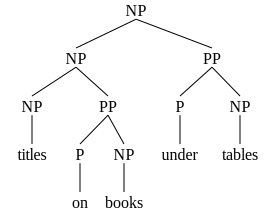

In [65]:
t1

In [66]:
t1.label()

'NP'

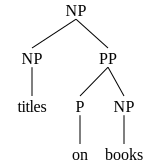

In [67]:
t1[0]

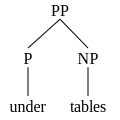

In [68]:
t1[1]

In [69]:
t1[1][0][0]

'under'

In [70]:
t1[(1,0,0)]

'under'